<a href="https://colab.research.google.com/github/ChrisHJYi/seocho_kaist_practice/blob/seocho_AI_HW/SCHW_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [68]:
### Google Drive 연동하는 법
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
train_data = pd.read_table('/content/gdrive/My Drive/seocho/HW_3_Final/SCHW_ratings_train.txt')
test_data = pd.read_table('/content/gdrive/My Drive/seocho/HW_3_Final/SCHW_ratings_test.txt')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [70]:
print(len(train_data))

150000


In [71]:
### 상위 5개 샘플 출력
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


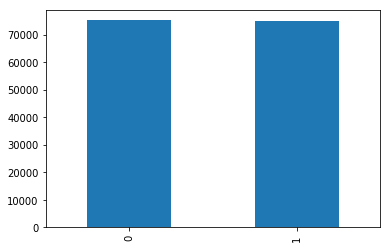

In [72]:
### train_data에서 긍/부정(1/0) 유무가 기재되어 있는 레이블 값의 분포도
%matplotlib inline
import matplotlib.pyplot as plt # 그래프 만들기 import
train_data['label'].value_counts().plot(kind='bar') # label => 전처리에서 만들어둔 이름

In [73]:
print(train_data.groupby('label').size().reset_index(name='count')) # 정확한 숫자가 알고 싶다면

   label  count
0      0  75173
1      1  74827


In [74]:
### null 값(긍정=1도 부정=0도 아님)이 있는지 확인
print(train_data.isnull().values.any())

True


In [75]:
### 어떤 열에 존재하는가?
print(train_data.isnull().sum())

id          0
document    5
label       0
dtype: int64


In [76]:
### 어느 인덱스?
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [77]:
### null 값 가지는 행 제거 / 확인
train_data = train_data.dropna(how='any') # 제거
print(train_data.isnull().values.any()) #확인

False


In [78]:
### 전체 데이터 개수 확인하여 제거가 되었는지 확인 (원래 150000개였음)
print(len(train_data))

149995


In [0]:
### 영어의 전처리
### 영어의 정규 표현식 [a-zA-Z]
### 알파벳과 공백을 제외하고 모두 제거하는 전처리 수행 예제
# import re
# text = 'do!!! you expec... people~ to~ read~ the FAQ, etc, and actually accept hare~! atheism?@@' # 예제 문장
# re.sub(r'[^a-zA-Z]', '', text) #알파벳과 공백 제외 모두 제거

### 활용하여 한국어에도 적용할 것 

In [80]:
### 한글과 공백 제외 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")
train_data[:5] # 샘플 5개 꺼내서 확인

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [0]:
### 토큰화와 불용어 제거 (불용어는 상황따라 계속 추가해 갈 수 있음)
# 불용어 제거
stopwords = ['의', '가', '이', '은', '는', '을', '를', '좀', '잘', '걍', '과', '도', '으로', '에서', '에', '와', '하다', '것', '자', '한' ]

In [82]:
### Googld Drive에서 konlpy 사용하기 / 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy


Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is 

In [83]:
### 토큰화를 위한 형태소 분석기 okt
import konlpy
from konlpy.tag import Okt
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [0]:
### train_data에 형태소 분석기를 사용하여 토큰화 하면서 불용어를 제거 => X_train에 저장
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) #토큰화
    temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
    X_train.append(temp_X)

In [87]:
print(X_train[:3]) #확인

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


In [0]:
### test_data도 동일하게 진행
test_data = test_data.dropna(how='any') #null값 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 ]", "") #정규 표현식 수행

X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) #토큰화
    temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
    X_test.append(temp_X)

In [0]:
### ===여기까지가 텍스트 전처리 ===


In [91]:
### 기계가 데이터를 숫자로 처리할 수 있도록 훈련 데이터 X_train과 테스트 데이터 X_text 에 대해서 정수 인코딩 수행
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words=max_words) #상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [92]:
print(X_train[:3]) #확인

[[48, 455, 16, 258, 658], [917, 457, 39, 597, 1, 212, 1453, 23, 963, 674, 19], [384, 2450, 25022, 2317, 5674, 2, 219, 9]]


리뷰의 최대 길이 :  70
리뷰의 평균 길이 :  10.524457481916064


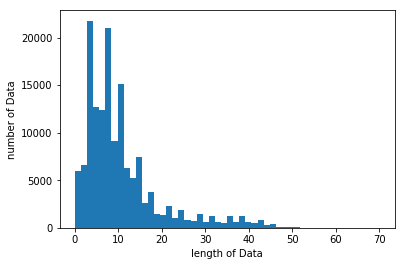

In [94]:
### 가장 길이가 긴 리뷰, 전체 데이터의 길이 분포 확인
print('리뷰의 최대 길이 : ', max(len(l) for l in X_train))
print('리뷰의 평균 길이 : ', sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
### LSTM으로 리뷰 감성 분류하기 ###

In [0]:
### 모델을 만들기 전 train_data와 test_data를 각각 y_train과 y_test에 저장
y_train = train_data['label']
y_test = test_data['label']

In [0]:
### 모델 만들기 / 필요한 도구(=모듈) 부르기
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
# 모델이 처리할 수 있도록 X_train과 X_test 의 모든 샘플 길이를 동일하게 해줌 / 여기선 30
max_len = 30

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [106]:
# 임베딩 벡터의 차원은 100 / 리뷰 분류에 LSTM 사용 / epoch는 4번 / 훈련 데이터 중 20 %를 검증 데이터로 사용 하면서 정확도 확인
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs= 4, batch_size=60, validation_split = 0.2) ### 개인 추가 :  X_train 과 y_train이 어디서 오는지 잘 볼 것


Train on 119996 samples, validate on 29999 samples
Epoch 1/4
119996/119996 [==============================] - 200s 2ms/step - loss: 0.3901 - acc: 0.8216 - val_loss: 0.3532 - val_acc: 0.8434
Epoch 2/4
119996/119996 [==============================] - 200s 2ms/step - loss: 0.3285 - acc: 0.8558 - val_loss: 0.3334 - val_acc: 0.8529
Epoch 3/4
119996/119996 [==============================] - 200s 2ms/step - loss: 0.3014 - acc: 0.8713 - val_loss: 0.3298 - val_acc: 0.8567
Epoch 4/4
119996/119996 [==============================] - 200s 2ms/step - loss: 0.2800 - acc: 0.8836 - val_loss: 0.3264 - val_acc: 0.8585


In [0]:
# test 데이터에 대한 정확도

In [108]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

49997/49997 [==============================] - 14s 281us/step

 테스트 정확도: 0.8540
